In [1]:
#import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read csv file and print first 5 records
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#total 16598 entries,11 columns,data types are float & int 7 and object are 4
#we can obsereve in the above result that the year column has the data type as float which should have been datetime,
#so we must convert it into datetime by the help of pandas functions.

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#As we see that Rank column is also numeric but it is not meaningful to perform statistics on it so we must remove it from the statistics info

In [7]:
df.drop(columns = 'Rank', inplace = True)

In [8]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [23]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [13]:
# what is the majority of games whose sales record are present
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

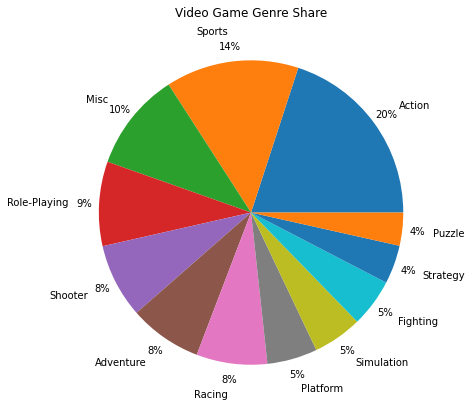

In [11]:
plt.figure(figsize=(7,7))
plt.pie(df.Genre.value_counts(), labels=df.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

In [12]:
# Action games have the highest count in the dataset will the Puzzle games have the least count.
# It could be due to the fact that many people are interested in video games that involve action in them as many consider puzzle based to be boring.

In [14]:
#analyse the number of games based on the platform
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

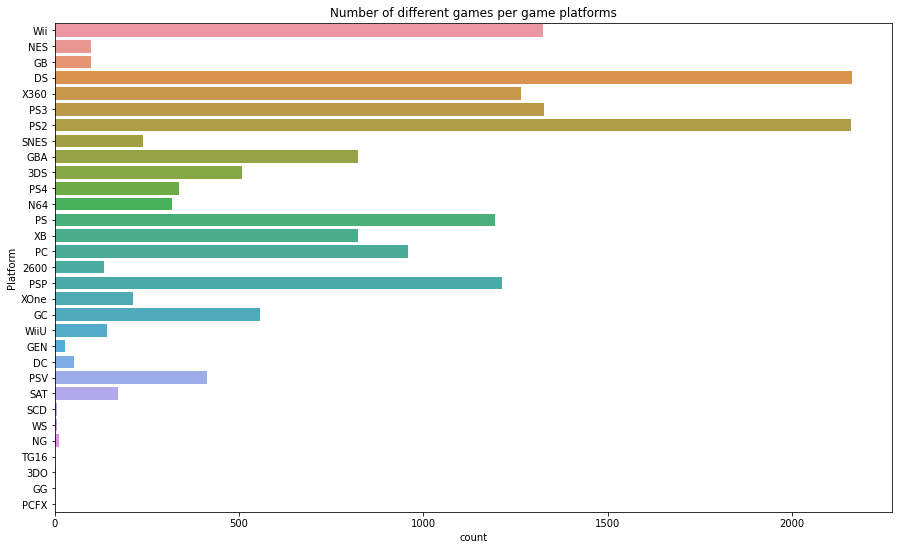

In [15]:
plt.figure(figsize = (15,9))
plt.title('Number of different games per game platforms')
sns.countplot(y='Platform', data=df)
plt.show()

In [16]:
#The most games are available for the DS and PS2 platforms which might mean that DS and PS2 are used by more customers But we cant be sure about that.

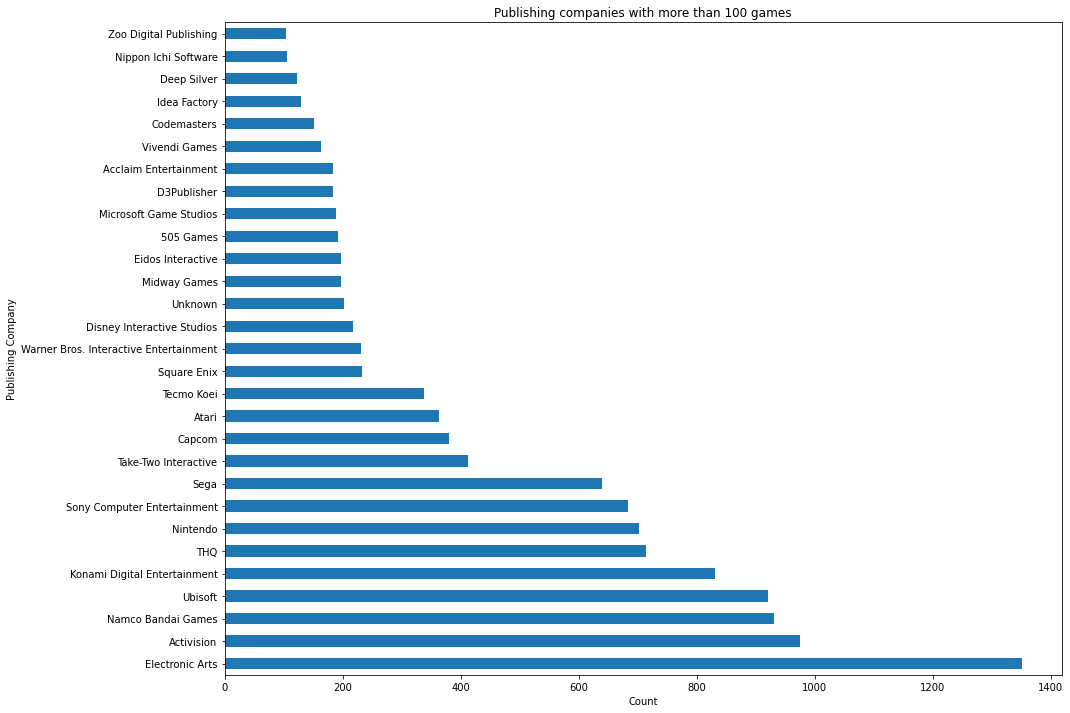

In [19]:
#Lets analyse the Publisher column to see which company publishes the what number of games.
#Lets consider publishers with game counts above 100 only .
plt.figure(figsize=(15,12))
publishers = df.Publisher.value_counts()
publishers = publishers[publishers.values > 100]
publishers.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Publishing Company')
plt.title('Publishing companies with more than 100 games')
plt.show()

In [21]:
#We see that Electronics Arts is the undisputed leader in terms of the video games sale count.
#One of the reason maybe the popularity of its sports based games like FIFA and Cricket

In [30]:
df['Year'] =  pd.to_datetime(df['Year'], format='%Y', errors='coerce')

In [29]:
#year wise sales
df['Year'].value_counts().sort_values(ascending=False)
df['year_only'] = df['Year'].dt.year
df['year_only'] = df['year_only'].astype(int, errors='ignore')

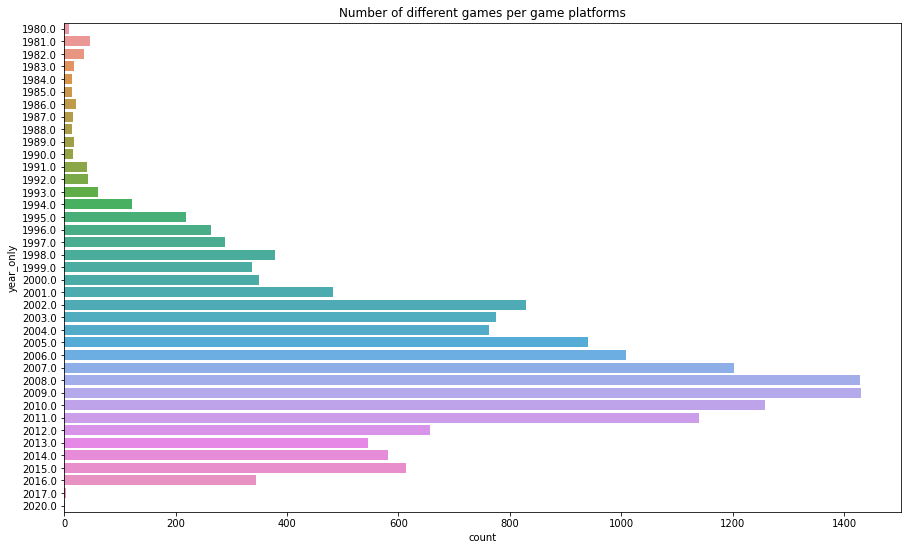

In [31]:
plt.figure(figsize = (15,9))
plt.title('Number of different games per game platforms')
sns.countplot(y='year_only', data=df)
plt.show()

In [32]:
#We can see that the sales were the higest in the years 2006 to 2011 and after that we can see a downfall of the total sales

In [37]:
#What are the top five game genres?
df.Genre.value_counts().head(5)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

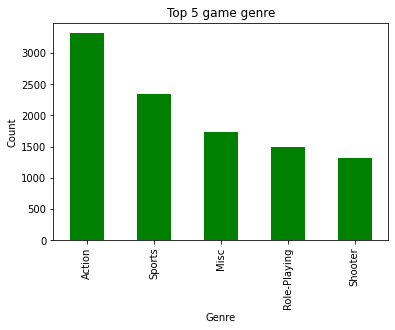

In [38]:
df.Genre.value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 game genre')
plt.show()

In [39]:
#Which region has the largest share in the global video games sales?
Total_Video_Games_Sales = df.Global_Sales.sum()
North_America_Sales_percent = (df.NA_Sales.sum()*100)/Total_Video_Games_Sales
Europe_Sales_percent = (df.EU_Sales.sum()*100)/Total_Video_Games_Sales
Japan_Sales_percent = (df.JP_Sales.sum()*100)/Total_Video_Games_Sales
Other_Region_Sales_percent = (df.Other_Sales.sum()*100)/Total_Video_Games_Sales

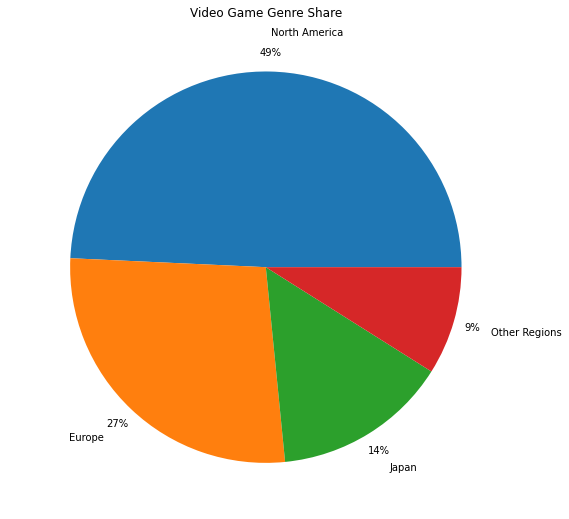

In [40]:
plt.figure(figsize=(16,9))
plt.pie([North_America_Sales_percent, Europe_Sales_percent, Japan_Sales_percent, Other_Region_Sales_percent], labels=['North America', 'Europe', 'Japan', 'Other Regions'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

In [42]:
# What are top 5 highest grossing games in North America ?
video_sales_NA_sorted_df = df.sort_values(by = ['NA_Sales'], ascending = False)
video_sales_NA_sorted_df.head()[['Name', 'NA_Sales']]

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
9,Duck Hunt,26.93
5,Tetris,23.20
2,Mario Kart Wii,15.85


In [ ]:
#The top grossing game in North America is Wii Sports with a total sales of 41.49 millions in North America followed by Super Mario Bros., Duck Hunt, Tetris and Mario Kart Wii.

In [46]:
#Which game has the highest sales in the other region(Exluding North America, Europe and Japan)?
video_sales_Other_sorted_df = df.sort_values(by = ['Other_Sales'], ascending = False)
video_sales_NA_sorted_df.head()[['Name', 'Other_Sales']]

,Name,Other_Sales
0,Wii Sports,8.46
1,Super Mario Bros.,0.77
9,Duck Hunt,0.47
5,Tetris,0.58
2,Mario Kart Wii,3.31
